<hr>
<div style="background-color: lightgray; padding: 20px; color: black;">
<div>
<img src="https://api-manager.universia.net/coreplatform-document-management/v2/document-management/public/1gdwholvlbd4c7" style="float: right; margin-right: 30px;" width="100"/> 
<font size="5"><b>Test Data Scientist - EDT </b></font> <br>
<font size="4.5"><b>The lapidarist problem</b></font> 
</div>
<div style="text-align: left">  <br>
Edison David Serrano Cárdenas. <br>
Maestría en Ciencias con Orientación en Matemáticas Aplicadas <br>
CIMAT - Sede Guanajuato <br>
</div>

</div>
<hr>

*Load Libraries:*

In [1]:
# load basic libraries
import numpy as np
import scipy.optimize as opt
import pandas as pd
import zipfile
import os

# load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# load machine learning libraries4
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Objectives

- Show your abilities in data loading, cleaning and descriptive analysis. Some rows contain errors. Extra points: clean these rows and include them in your analysis.

- Show your modeling abilities. Bonus points for testing your model’s error using a test set.

## Problem Description


The limousine comes to a full stop. As the driver gets out to open the door you take a deep breath and get inside. Inside the meeting room you find the Prime Minister, accompanied by a fat, tall man and a short, deform one with long ears and an even longer nose.

- **Prime Minister:** “Ah! You’re here! Great! Let me introduce my guests. This is Fidelious, Minister of Magic, and Krenk, the owner of the Gringotts Wizarding Bank.”

- **You:** “Uhhh, ma’am, is this a joke?”

- **Fidelious:** “Not at all, but don’t worry, don’t sweat the details, tomorrow you won’t remember anything. Security measures, you see.”

- **Krenk:** “Let’s move things along. I don’t like to be exposed to Muggles.”

- **You:** “What...” The Prime Minister interrupts you.

- **Prime Minister:** “Our friends here seem to have run into a bit of an issue, see, some diamonds seem to have been stolen from the bank. Problem is, the only person... goblin, sorry, ...who saw the diamonds prior to the robbery is our distinguished guest, Krenk.”

- **Fidelious:** “And while the Ministry completely believes Krenk as to the diamonds’ worth, we need another person to validate his claim. Safety policies, you see.”

- **Prime Minister:** “So, since you’re the best data scientist in our country, I thought you could help. Mr. Krenk will provide you with the characteristics of the missing diamonds so you can give us an estimate of how much the stolen diamonds are worth.”

- **You:** “But I’m not a lapidarist.”

- **Prime Minister:** “Which is why we’re providing you with a huge dataset, containing characteristics and prices for tens of thousands of diamonds. Now, get working.“

“Huge? Tens of thousands?“ You think. “And I thought I was the clueless one here.”

A lapidarist is an expert in precious stones and the art or techniques used in cutting and engraving them.


Here are the characteristics from Krenk’s diamonds

<center>
<img src="./images/Characteristics_Diamonds.png" style="float: center; margin-right: 30px;" width="500"/> 
</center>

## Exploratory Analysis

***Data Loading:***

In [2]:
# Define paths
zip_file_path = './data/diamonds.zip'  # Replace with your .zip file path
extracted_folder_path = './data/diamonds/'  # Replace with the desired output folder

# Extract files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Verify the extracted files
extracted_files = os.listdir(extracted_folder_path)
print(f'Extracted files: {extracted_files}')

Extracted files: ['coords_diamonds.csv', 'diamonds.csv']


In [3]:
# Load the data
coords_diamonds = pd.read_csv(extracted_folder_path + 'coords_diamonds.csv', index_col=0)
diamonds = pd.read_csv(extracted_folder_path + 'diamonds.csv', index_col=0)

***Data Cleaning:***

- coords_diamonds variable:

In [4]:
# Function to check if a value is numeric
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Apply the function to each element in the DataFrame and identify non-numeric values
non_numeric_mask = coords_diamonds.applymap(lambda x: not is_numeric(x))
non_numeric_mask[non_numeric_mask.any(axis=1)]

,latitude,longitude
48185,True,False


The non-numeric values are in the 'x' and 'y' columns, so we will remove it. Another option would be to replace latitude with 33.200088.

In [5]:
# The non-numeric values are in the 'x' and 'y' columns, so we will remove them. Another option would be to replace latitude with 33.200088.
coords_diamonds.iloc[48185]

latitude      33q.200088
longitude    -105.624152
Name: 48185, dtype: object

In [6]:
# Identify the missing values
coords_diamonds.isnull().sum()

latitude      0
longitude     0
dtype: int64

- diamonds coordinates:

In [7]:
# Identify the missing values
diamonds.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth      2962
table         0
price         0
x          1090
y           585
z             0
dtype: int64

*Category variables analysis:*

In [8]:
diamonds['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', "*'E", '#F', '&G', '!H', '?J',
       '#D', '&I', '!I', '?G', '#H', '?H', '?E', "*'F", '!E', '&F', '#G',
       "*'I", '!F', '&E'], dtype=object)

In [9]:
diamonds['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair', 'Very Goo!d',
       "P*'remium", 'I#deal', '#Very Good', 'P?remium', "*'Ideal",
       '!Good', 'Pre!mium', 'Pr?emium', 'Very Go#od', 'Ide&al', 'Ide!al',
       'Id!eal', '&Premium', 'Go?od', 'G#ood', "Very *'Good", "Ide*'al",
       'V&ery Good', '&Ideal', 'Very G#ood'], dtype=object)

In [10]:
diamonds.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF', 'S?I1',
       'SI!1', '&VS2', '&SI2', "S*'I1", 'VS?1', "S*'I2", '#VS1', 'V&S2',
       'V!S2', '!VS2', 'VS#2', "VVS*'2", "*'SI2", 'VV?S1', 'S&I1',
       "*'SI1", 'SI?1', 'VV#S1', 'V#S2', '#SI!1', 'S!I2'], dtype=object)

*Concatenate DataFrames, drop missing and non-numeric values, and correct string values:*

In [11]:
# concatenate the two DataFrames
df_diamonds = pd.concat([diamonds, coords_diamonds], axis=1)

# Drop the rows with missing values
df_diamonds = df_diamonds.dropna()

# delete non-numeric rows
df_diamonds = df_diamonds.drop(48185)
coords_diamonds = coords_diamonds.drop(48185)

# dtypes of the columns in the DataFrame
df_diamonds.latitude = df_diamonds.latitude.astype(float)
coords_diamonds.latitude = coords_diamonds.latitude.astype(float)

# correct string values in the columns with regular expressions
df_diamonds.color = df_diamonds.color.str.replace(r'[^A-Z]','', regex=True)
df_diamonds.cut = df_diamonds.cut.str.replace(r'[^a-zA-Z]','', regex=True)
df_diamonds.clarity = df_diamonds.clarity.str.replace(r'[^a-zA-Z0-9]','', regex=True)

# remove the rows with x, y and z less than or equal to zero
df_diamonds = df_diamonds[(df_diamonds['x'] > 0) & (df_diamonds['y'] > 0) & (df_diamonds['z'] > 0)]

In [41]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,latitude,longitude
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,39.881389,-83.093056
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,33.415000,-111.548889
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,40.167222,-105.101389
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,37.371111,-85.583056
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,48.539444,-121.745000


***Descriptive Analysis:***

- Visualizing Geographical Data:

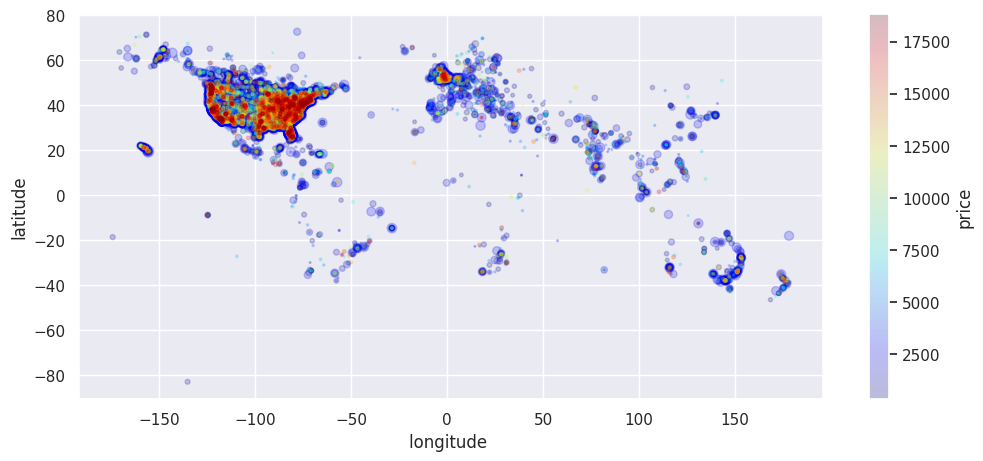

In [12]:
df_diamonds.sort_values(by='price', ascending=True).plot(kind='scatter', x='longitude ' , y='latitude',
                 c="price",cmap = "jet", s = df_diamonds["price"]/400, alpha=0.2,colorbar=True, 
                 figsize=(12,5))
plt.show()

- Attibute histogram plot:

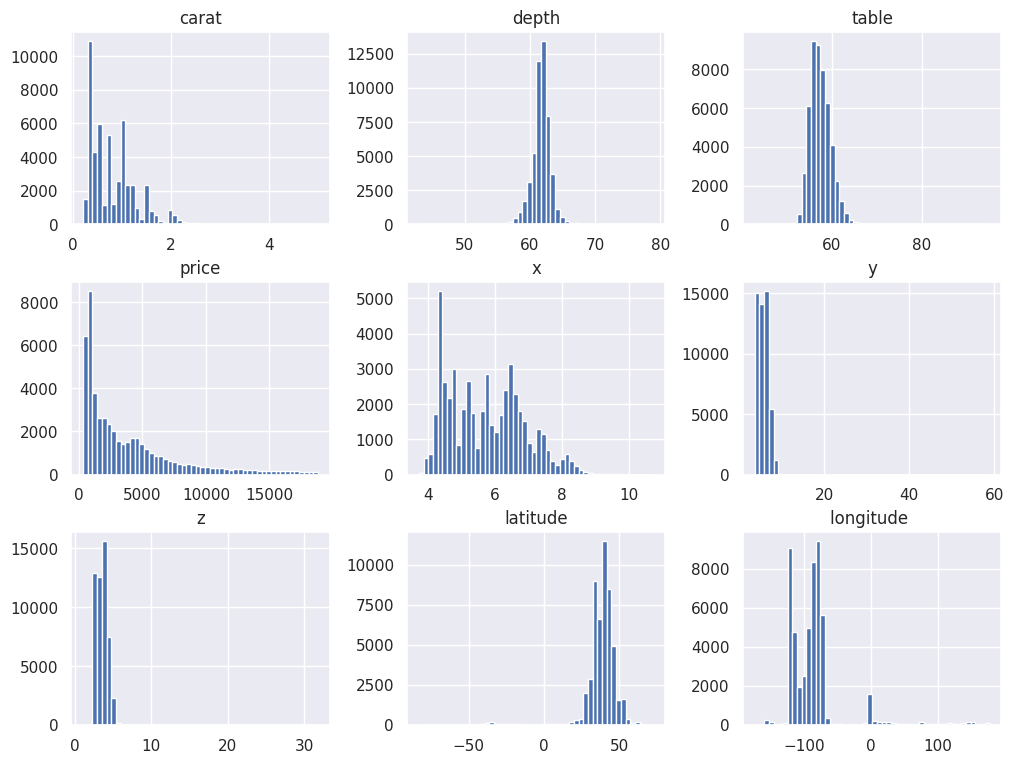

In [13]:
df_diamonds.hist(bins=50, figsize=(12,9))
plt.show()

- Visualize the categorical columns:

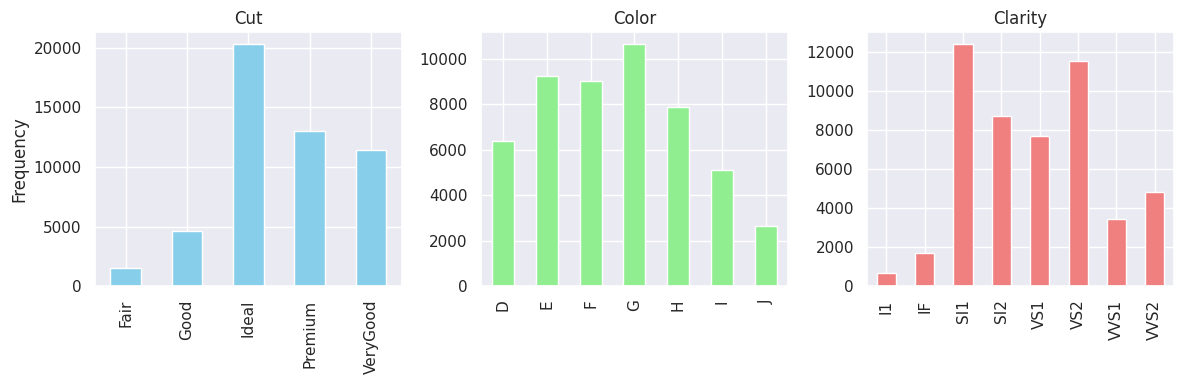

In [14]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot the 'cut' column
df_diamonds['cut'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Cut')
axes[0].set_ylabel('Frequency')

# Plot the 'color' column
df_diamonds['color'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Color')

# Plot the 'clarity' column
df_diamonds['clarity'].value_counts().sort_index().plot(kind='bar', ax=axes[2], color='lightcoral')
axes[2].set_title('Clarity')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

- Correlation Matrix:

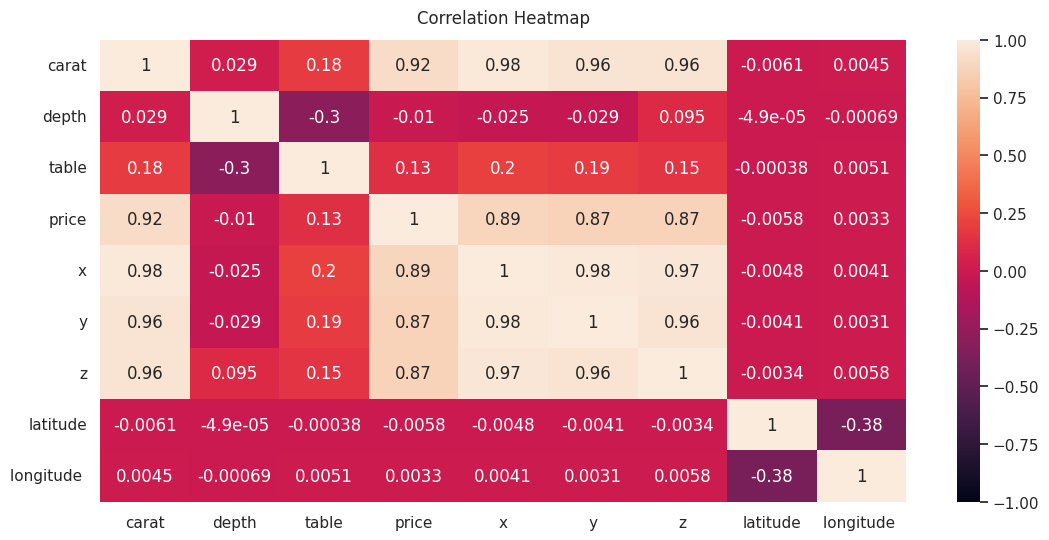

In [32]:
var_list = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'latitude', 'longitude ']
# Create a figure and a subplot
plt.figure(figsize=(13,6))
# Create a heatmap
heatmap = sns.heatmap(df_diamonds[var_list].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

The most correlated variable is *carat* with a negative coefficient of 0.9214.

In [16]:
df_diamonds[var_list].corr()["price"].sort_values(ascending=False)

price         1.000000
carat         0.921450
x             0.886992
y             0.871129
z             0.867318
table         0.127255
longitude     0.003336
latitude     -0.005807
depth        -0.009951
Name: price, dtype: float64

## Data Preparation

- LabelEncoder:

In [17]:
le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

df_diamonds['cut'] = le_cut.fit_transform(df_diamonds['cut'])
df_diamonds['color'] = le_color.fit_transform(df_diamonds['color'])
df_diamonds['clarity'] = le_clarity.fit_transform(df_diamonds['clarity'])

In [18]:
X = df_diamonds.drop(columns=['price']).values
y = df_diamonds['price'].values

- Data Splitting:

In [19]:
np.random.seed(42)
# In the first step we will split the data in training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8)
# we have to define valid_size=0.5 (that is 50% of validation data)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

- Feature Scaling:

In [20]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Model Training

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

In [22]:
df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2'])

In [23]:
i=0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    df.loc[i] = [name, mse(y_val, y_pred), mae(y_val, y_pred), r2_score(y_val, y_pred)]
    i+=1

/home/edserranoc/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.435e+09, tolerance: 1.637e+07
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1681
[LightGBM] [Info] Number of data points in the train set: 10186, number of used features: 11
[LightGBM] [Info] Start training from score 3965.604261


In [24]:
# Define a function to highlight the min and max
def highlight_min(s):
    return ['background-color: red' if v == s.min() else '' for v in s]

def highlight_max(s):
    return ['background-color: red' if v == s.max() else '' for v in s]

df.style.apply(highlight_min, subset=['MSE', 'MAE']).apply(highlight_max, subset=['R2'])

,Model,MSE,MAE,R2
0,Linear Regression,1788713.251643,863.391319,0.887233
1,Ridge Regression,1787260.470255,862.588589,0.887324
2,Lasso Regression,1786248.825833,860.306932,0.887388
3,SVR,13026423.727139,2017.036437,0.178764
4,Decision Tree Regression,719161.901688,432.236527,0.954661
5,Random Forest Regression,367366.085092,310.008625,0.976840
6,XGBoost,371714.077029,311.672872,0.976566
7,LightGBM,339725.762661,303.948574,0.978582


## Model Perfomance

In [25]:
print("The best model performance on the test set:\n")
print("mse:",round(mse(y_test, models['LightGBM'].predict(X_test)),4))
print("mae:",round(mae(y_test, models['LightGBM'].predict(X_test)),4))
print("r2: ",round(r2_score(y_test, models['LightGBM'].predict(X_test)),4))

The best model performance on the test set:

mse: 347721.6643
mae: 308.1401
r2:  0.9781


## Conclusions

In [26]:
data_diamond = {'carat':[0.71, 0.83, 0.50, 0.39, 0.32, 0.90, 0.51, 1.12, 0.40, 0.36],
                'cut':  ['Good', 'Ideal', 'Ideal', 'Premium', 'Premium', 'Good', 'Ideal', 'Ideal', 'Ideal', 'Premium'],
                'color':['I', 'G', 'E', 'J', 'G', 'F', 'D', 'G', 'G', 'I'],
                'Clarity':['VVS2', 'VS1', 'VS2', 'VS1', 'VS1', 'SI2', 'VS1', 'VVS2', 'VVS2', 'VS2'],
                'Depth':[63.1, 62.1, 61.5, 61.6, 62.1, 63.3, 60.9, 62.1, 62.4, 62.7],
                'Table':[58.0, 55.0, 55.0, 59.0, 56.0, 57.0, 57.0, 54.8, 56.0, 59.0],
                'x':[5.64, 6.02, 5.11, 4.67, 4.43, 6.08, 5.20, 6.64, 4.72, 4.54],
                'y':[5.71, 6.05, 5.16, 4.71, 4.40, 6.14, 5.17, 6.66, 4.74, 4.58],
                'z':[3.58, 3.75, 3.16, 2.89, 2.74, 3.87, 3.16, 4.13, 2.95, 2.86],
                'latitude':[35.02636, 35.00350, 35.10544, 34.94666, 35.18864, 35.26611, 35.51572, 36.16361, 37.68919, 38.66303],
                'longitude':[-114.38351, -109.78961, -106.66967, -104.64730, -101.98602, -99.63874, -97.67080, -95.75950, -92.64730, -90.21808]}

df_diamond = pd.DataFrame(data_diamond)
df_diamond['cut'] = df_diamond['cut'].astype(str)
df_diamond['color'] = df_diamond['color'].astype(str)
df_diamond['Clarity'] = df_diamond['Clarity'].astype(str)

In [27]:
df_diamond['cut'] = le_cut.transform(df_diamond['cut'])
df_diamond['color'] = le_color.transform(df_diamond['color'])
df_diamond['Clarity'] = le_clarity.transform(df_diamond['Clarity'])

X_diamond = df_diamond.values
X_diamond = scaler.transform(X_diamond)

df_diamond['price'] = models['LightGBM'].predict(X_diamond)

display(df_diamond)

,carat,cut,color,Clarity,Depth,Table,x,y,z,latitude,longitude,price
0,0.71,1,5,7,63.1,58.0,5.64,5.71,3.58,35.02636,-114.38351,2307.629417
1,0.83,2,3,4,62.1,55.0,6.02,6.05,3.75,35.00350,-109.78961,3774.655792
2,0.50,2,1,5,61.5,55.0,5.11,5.16,3.16,35.10544,-106.66967,1636.301692
3,0.39,3,6,4,61.6,59.0,4.67,4.71,2.89,34.94666,-104.64730,596.931614
4,0.32,3,3,4,62.1,56.0,4.43,4.40,2.74,35.18864,-101.98602,718.524745
5,0.90,1,2,3,63.3,57.0,6.08,6.14,3.87,35.26611,-99.63874,3584.772159
6,0.51,2,0,4,60.9,57.0,5.20,5.17,3.16,35.51572,-97.67080,1852.049398
7,1.12,2,3,7,62.1,54.8,6.64,6.66,4.13,36.16361,-95.75950,8681.983230
8,0.40,2,3,7,62.4,56.0,4.72,4.74,2.95,37.68919,-92.64730,1013.646940
9,0.36,3,5,5,62.7,59.0,4.54,4.58,2.86,38.66303,-90.21808,610.806731


In [28]:
print("The price of the diamonds are: $", round(df_diamond['price'].sum(),3))

The price of the diamonds are: $ 24777.302


## References

[1] https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb <br>
[2] https://github.com/edserranoc/Mathematics_for_Machine_Learning_Course/blob/main/1.%20Binary_Classification/Binary%20Classification.ipynb <br>